In [67]:
import pandas as pd
import sys
sys.path.append('./src/')
import doc_utils
import feature_utils
import imp
imp.reload(feature_utils)  

<module 'feature_utils' from './src/feature_utils.py'>

In [68]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, TfidfTransformer

tdidf = TfidfVectorizer(min_df=4,norm='l1')

In [69]:
block_db = pd.read_csv("block_db.csv")
block_db

,text,is_nar,doc_idx,par_idx,par_type,block_type,nar_idx
0,CLIENT,0.000000,0.000000,0.000000,no_mark,not_nar,0.000000
1,THERAPIST,0.000000,0.000000,1.000000,no_mark,not_nar,0.000000
2,@ התחל,0.000000,0.000000,2.000000,no_mark,not_nar,0.000000
3,@ שפה:\tעב,0.000000,0.000000,3.000000,no_mark,not_nar,0.000000
4,@ משתתפים:,0.000000,0.000000,4.000000,no_mark,not_nar,0.000000
...,...,...,...,...,...,...,...
1356,* :\tככה כמה דקות אה... לא לא לא בסדר,0.000000,5.000000,269.000000,therapist,not_nar,0.000000
1357,* :\tלא לא לא בסדר יש לך את הדקות בשביל ה,0.000000,5.000000,270.000000,client,not_nar,0.000000
1358,* :\tיש לך את הדקות בשביל ה,0.000000,5.000000,271.000000,therapist,not_nar,0.000000
1359,"* :\t את הזה, השאלון?",0.000000,5.000000,272.000000,client,not_nar,0.000000


In [70]:
cl_th_db = block_db.query("par_type in ['client','therapist']")

## Process with TFidf and run SGDClassifier

Run model for par_type == 'client'
total data len: 622
len train: 466, len test: 156
['10', '14', 'l1', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אוקיי', 'אחי', 'איזשהו', 'איזשהי', 'איתה', 'איתי', 'איתך', 'איתם', 'אלי']
['ידעתי', 'יושב', 'יחסים', 'יחסית', 'יכולים', 'יכולתי', 'ילד', 'ימים', 'יצא', 'יקרה', 'ישבתי', 'ישר', 'כאילו', 'כזאת', 'כיף', 'כללי', 'כשאני', 'לאיזה', 'לבוא', 'לגמרי']
['10', 'אמרת', 'בסדר', 'הגבולות', 'והם', 'יקרה', 'לפגוע', 'ממה', 'סבבה', 'קרוב', 'תראי']


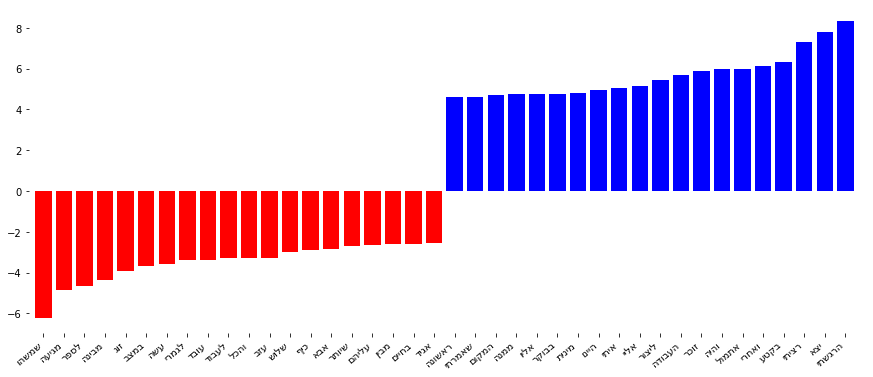

              precision    recall  f1-score   support

         0.0       0.63      0.60      0.61        84
         1.0       0.56      0.60      0.58        72

    accuracy                           0.60       156
   macro avg       0.60      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156

Run model for par_type in ['client','therapist']
total data len: 1251
len train: 938, len test: 313
['10', '14', '20', 'l1', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אוקי', 'אוקיי', 'איזשהו', 'איזשהי', 'איכשהו', 'אישי', 'איתה', 'איתי']
['יכולתי', 'ילד', 'ילדה', 'יצא', 'יצר', 'יקרה', 'ישבתי', 'ישירות', 'ישר', 'כאילו', 'כושר', 'כזאת', 'כיף', 'כלומר', 'כלל', 'כללי', 'כשאני', 'כשאתה', 'כשהוא', 'לאו']
['10', 'באותו', 'ברמה', 'המשא', 'והם', 'כאילו', 'לפתוח', 'ממני', 'עוברים', 'שאפשר', 'תשמע']


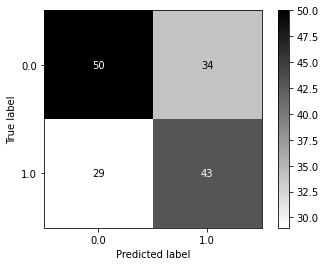

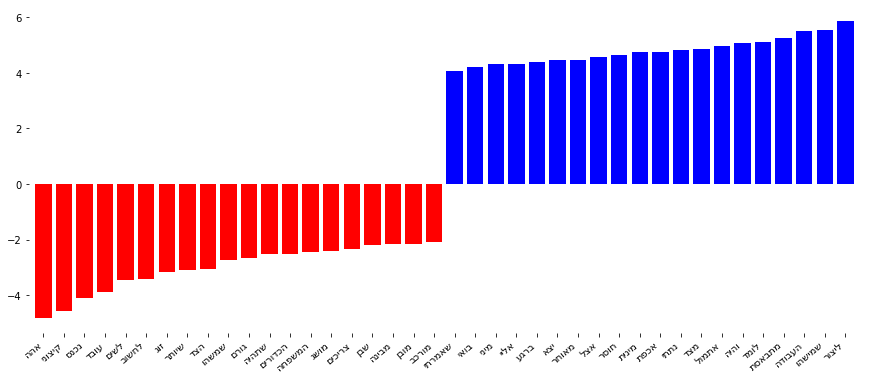

              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69       172
         1.0       0.62      0.50      0.55       141

    accuracy                           0.64       313
   macro avg       0.63      0.62      0.62       313
weighted avg       0.63      0.64      0.63       313



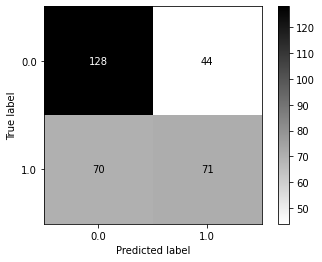

In [71]:
queries = ["par_type == 'client'",
            "par_type in ['client','therapist']"]
for q in queries:
    print("Run model for {}".format(q))
    feature_utils.run_model(block_db.query(q))

## Embedded - fasttext fro Hebrew

In [73]:
import fasttext.util
ft = fasttext.load_model('./external_src/cc.he.300.bin')

In [76]:
doc_utils.sent_db

AttributeError: module 'doc_utils' has no attribute 'sent_db'